# Predicting Iris flowers using Support Vector Machines 

## Introduction and Intuition 

The idea of a support vector machine, or SVM, is another supervised learning algorithm that provides an alternate approach to solving problems of accurate modeling and prediction. A support vector really is just a line of reference  striking through negative and positive examples of a training set, respectively. The approach used by the SVM model is to maximize the distance between these two vectors, creating a space whose midline would be the decision boundary and prediction would be based on which side of the boundary a sample lies. Maximizing this region would give a broader region in which new samples could come up and still be correctly classified, solving the problem of overfitting. For this reason, this algorithm is often intuitively referred to as the 'widest street method'.

## Kernels

An important feature of the SVM model is that it supports the training of data with non-linear decision boundaries. We don't encounter this problem in the case of the Iris dataset, but for intuition, imagine a plot of sample data consisting of negative and positive samples that cannot be roughly seperated by a linear boundary. We may require a circular boundary, or a curved boundary, or one of any other form. The way SVM's deal with this is by using kernels. The general idea behind kernels is to map the samples onto a different space based on some similarity function that would take the sample and some constant 'reference sample' as parameters, essentially creating a new sample space in which the samples will appear linearly seperable. At that point, one way to make predictions is to do so in that sample space and then map the decision back. The difference in various kernels depends on choice of similarity function. This demonstration shows linear, rbf(radial basis function or Guassian), polynomial, and sigmoid kernels. 

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder



# function for plotting decision regions, credits: Raschka & Mirjalili

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=colors[idx],
                       marker=markers[idx], label=cl,
                       edgecolor='black')
        
    # highlight test samples
    if test_idx:
           # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                       c='', edgecolor='black', alpha=1.0,
                       linewidth=1, marker='o',
                       s=100, label='test set')

In [118]:
# helper functions for retrieving sklearn's built in metrics for each model. 
def get_scores(model, X_test, y_test):
    return model.score(X_test, y_test)

def correct_predictions(model, X_test, y_test):
    correct = 0
    res = model.predict(X_test)
    for i in range(len(res)):
        if res[i] == y_test[i]:
            correct += 1 
    return correct


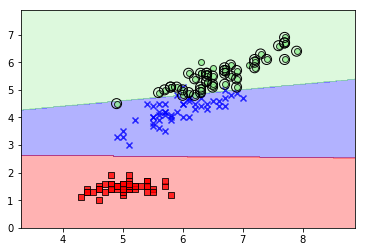

In [119]:
df = pd.read_csv('iris.csv', header = None, names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"])

# initialize classifiers

C = 1.0
models = (svm.SVC(kernel = 'linear', probability = True, C=C),
          svm.SVC(kernel = 'sigmoid',coef0 = 10, gamma = 10, probability = True, C=C),
          svm.SVC(kernel='rbf', gamma = 0.7, probability=  True, C=C),
          svm.SVC(kernel='poly', degree = 3, probability = True, C=C),
         )

#seperate data from 'answers'

x, y = df.drop('Species', axis=1), df.Species

# convert labels to integers for compatibility with plot_decision_regions function 
le = LabelEncoder()
y_enc = le.fit_transform(y)

x = x.values
y = y_enc

# retain two features for plotting

x_plt = x[:,[0,2]]

# train the classifier 

models = [clf.fit(x_plt,y) for clf in models]

# linear kernel
plot_decision_regions(x_plt,y, classifier = models[0], test_idx=range(105,150))

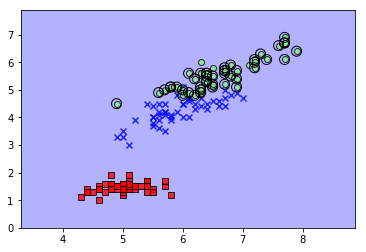

In [120]:
# sigmoid
plot_decision_regions(x_plt,y, classifier = models[1], test_idx=range(105,150))

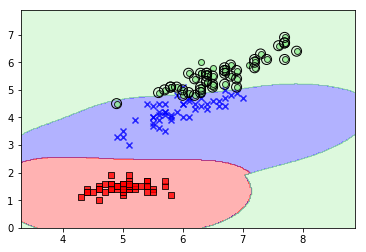

In [121]:
# RBF kernel
plot_decision_regions(x_plt,y, classifier = models[2], test_idx=range(105,150))

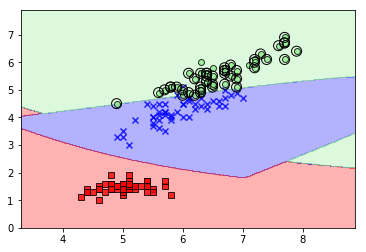

In [122]:
# poly kernel
plot_decision_regions(x_plt,y, classifier = models[3], test_idx=range(105,150))

In [123]:
# obtain a test sample for retrieving metrics on each model, although X_train and y_train will not be used since the SVM's
# are already trained on all samples. Since the initial training was done on two features to facilitate plotting, 
# another set of models is trained using all features to get more accurate results. 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

models_all = [clf.fit(x,y) for clf in models]

scores = [get_scores(model, X_test, y_test) for model in models_all]    

print("Scores for each model:")
print(scores)

# for added analytics, we can quantify the amount of correct predictions per model: 

hits = [correct_predictions(model, X_test, y_test) for model in models_all]

print("Success rate per 30 test samples: ")
print(hits)


Scores for each model:
[0.9666666666666667, 0.3333333333333333, 0.9333333333333333, 0.9333333333333333]
Success rate per 30 test samples: 
[29, 10, 28, 28]


## Conclusion
As seen from the above outputs, all but the sigmoid kernel work well on the Iris dataset, the shape of which may not lend itself well to the distribution of the classifications. In reality, a linear model is sufficient for this particular problem and so the issue of non-linear boundaries is not very pronounced. These results may be replicated by repeatedly running the above cell so as to produce new test samples. In addition, certain parameters in the SVC implementation of these libraries may be tuned. For example, the degree of the polynomial in the poly model can be modified. However, in this case this does not change the results very much, neither does a modification of the gamma coeficient. 